<h1 style="text-align: center; font-weight: bold;">Data Sciense Course - Spring 1403</h1>
<h1 style="text-align: center; font-weight: bold;">Computer Assignment 5 - Introduction to Data Science </h1>
<h1 style="text-align: center;">Mohammadreza Mohammadhashemi : 810100206</h1>
<h1 style="text-align: center;">Soheil Hajian Manesh : 810100119</h1>
<h1 style="text-align: center;">Mahdi Ebrahimi Soltani : 810100241</h1>

# Problem Description
The aim of this assignment is to analyze the likelihood of scoring a goal through a football shot using feature engineering techniques. It involves preprocessing a football-related dataset to identify factors influencing goal-scoring. Additionally, the assignment delves into regression and cross-validation concepts, implementing multivariate regression and k-fold cross-validation from scratch, and applying them to car-related datasets for comparison with built-in libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Preprocessing

In [4]:
org_football_df = pd.read_csv("football.csv")

In [5]:
org_football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [6]:
org_football_df.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.00,8925.00,8925.00,8925.00,8925.00,8925.00
mean,14.56,0.36,2.53,0.34,48.54,29.24
std,7.84,9.00,1.39,0.68,26.40,17.31
min,0.00,-33.92,0.00,0.00,0.00,0.00
25%,8.48,-5.74,2.00,0.00,26.00,14.00
50%,12.47,0.50,2.00,0.00,49.00,29.00
75%,20.95,6.73,3.00,0.00,71.00,44.00
max,70.82,33.92,11.00,7.00,98.00,59.00


In [7]:
org_football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [8]:
org_football_df.tail(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
8920,m_57,p_115,open play,head,6.48,3.99,3,0,high,69,50,missed chance
8921,m_59,p_76,open play,right foot,21.45,-8.73,4,1,medium,15,53,blocked shot
8922,m_55,p_150,open play,left foot,11.97,3.24,3,0,medium,84,34,missed chance
8923,m_33,p_130,open play,right foot,6.48,-6.98,1,0,high,4,39,missed chance
8924,m_142,p_37,open play,right foot,8.23,26.43,2,0,medium,72,17,saved by keeper


In [9]:
org_football_df.dtypes

matchId                   object
playerId                  object
playType                  object
bodyPart                  object
x                        float64
y                        float64
interveningOpponents       int64
interveningTeammates       int64
interferenceOnShooter     object
minute                     int64
second                     int64
outcome                   object
dtype: object

### divide outcome value into goal or missed

In [10]:
outcome_mapping = {
    "blocked shot": "missed",
    "goal": "goal",
    "hit the post": "missed",
    "missed chance": "missed",
    "saved by keeper": "missed",
}

org_football_df["outcome"] = org_football_df["outcome"].map(outcome_mapping)
org_football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,missed
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,missed
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [11]:
def print_unique_elements(df, columns):
    for column in columns:
        try:
            print(f"\033[94m{column}\033[0m:")
            unique_counts = df[column].value_counts()
            i = 0
            for value, count in unique_counts.items():
                i = i + 1
                print(f"        \033[91m{value}\033[0m {count}")
        except KeyError:
            print(f"    Column '{column}' not found in the DataFrame.")

In [12]:
print_unique_elements(
    org_football_df, ["playType", "bodyPart", "interveningOpponents", "interveningTeammates" ,"interferenceOnShooter", "outcome" , "shotPosition"]
)

playType:
        open play 8378
        free kick 417
        penalty 126
        olimpico 4
bodyPart:
        right foot 4454
        left foot 2897
        head 1515
        other 59
interveningOpponents:
        2 3150
        3 2135
        1 1885
        4 879
        5 399
        6 217
        7 119
        0 97
        8 38
        9 3
        10 2
        11 1
interveningTeammates:
        0 6746
        1 1554
        2 462
        3 133
        4 26
        5 3
        7 1
interferenceOnShooter:
        medium 4186
        low 3315
        high 1390
outcome:
        missed 7810
        goal 1081
shotPosition:
    Column 'shotPosition' not found in the DataFrame.


### Change olimpico playType to free kick

In [13]:
org_football_df["playType"] = org_football_df["playType"].replace("olimpico", "free kick")

print(org_football_df["playType"].unique())

['open play' 'free kick' 'penalty']


### Label Encoding

In [14]:
le = LabelEncoder()

org_football_df["playType"] = le.fit_transform(org_football_df["playType"])
org_football_df["bodyPart"] = le.fit_transform(org_football_df["bodyPart"])
org_football_df['interferenceOnShooter'] = le.fit_transform(org_football_df['interferenceOnShooter'])

org_football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,1,3,13.47,-11.22,1,0,2,70,9,goal
1,m_17,p_16,1,1,9.48,14.22,3,0,2,55,4,missed
2,m_111,p_88,0,1,29.43,-1.25,6,2,1,86,31,missed
3,m_142,p_87,1,3,26.93,1.00,4,1,2,77,2,missed
4,m_117,p_9,1,3,10.72,5.24,2,0,2,76,46,goal


- **playType:**      
0.    free kick     
1.    open play       
2.    penalty                    
- **bodyPart:**             
0.    head      
1.    left foot           
2.    other               
3.    right foot               
- **interferenceOnShooter:**           
0.    high             
1.    low                  
2.    medium                    

In [15]:
pp_football_df = org_football_df.copy(deep=True)

In [16]:
def calculate_angle(x, y):
    theta = 7.32 * x / (x ** 2 + y ** 2 - (7.32/2) **2) 
    if np.arctan(theta) >= 0:
        angle = np.rad2deg(np.arctan(theta))
    else:
        angle = np.rad2deg(np.arctan(theta + np.pi))
    return angle

In [17]:
pp_football_df["distance"] = np.sqrt(pp_football_df["x"] ** 2 + pp_football_df["y"] ** 2)

pp_football_df['angle'] = pp_football_df.apply(lambda row: calculate_angle(row['x'], row['y']), axis=1)

### Add shot position feature to dataframe

![Alt text](shot_geometric.png)

In this section i define a feature using angle and x,y coordinates of shooter named shot position.If player is in 1st circle the probability of goal is 30%.If he is in 2nd circle the probability of goal is 15% and in 3rd circle the probability of goal is 7%.others just less than 6% chance of goal.     
Source : https://soccermatics.readthedocs.io/en/latest/lesson2/GeometryOfShooting.html#reaction-time

In [18]:
def calculate_shot_position(row):
    x = row["x"]
    y = row["y"]
    angle = row["angle"]

    if (x < 5.5) and (-3.6 < y < 3.6):
        return "30% circle"
    elif (x < 12.5) and (-6.4 < y < 6.4) and (34 < angle <= 180):
        return "15% circle"
    elif (x < 20.15) and (-14.6 < y < 14.6) and (angle > 18):
        return "7% circle"
    else:
        return "out of circles"


pp_football_df["shotPosition"] = pp_football_df.apply(calculate_shot_position, axis=1)

In [19]:
pp_football_df["shotPosition"] = le.fit_transform(pp_football_df["shotPosition"])

- **shotPosition:** 
0. 15% circle 
1. 30% circle 
2. 7% circle
3. out of circle

In [20]:
def print_missing_percentages(df):
    total_rows = len(df)

    missing_values = {}

    for col in df.columns:
        missing_count = df[col].isnull().sum()

        missing_percentage = (missing_count / total_rows) * 100

        missing_values[col] = {"count": missing_count, "percentage": missing_percentage}

    for col, values in missing_values.items():
        print(f"{col}: {values['count']} missing values ({values['percentage']}%)")

In [21]:
print_missing_percentages(pp_football_df)

matchId: 0 missing values (0.0%)
playerId: 0 missing values (0.0%)
playType: 0 missing values (0.0%)
bodyPart: 0 missing values (0.0%)
x: 0 missing values (0.0%)
y: 0 missing values (0.0%)
interveningOpponents: 0 missing values (0.0%)
interveningTeammates: 0 missing values (0.0%)
interferenceOnShooter: 0 missing values (0.0%)
minute: 0 missing values (0.0%)
second: 0 missing values (0.0%)
outcome: 34 missing values (0.38095238095238093%)
distance: 0 missing values (0.0%)
angle: 0 missing values (0.0%)
shotPosition: 0 missing values (0.0%)


We can understand that each record that is missing interferenceOnShooter field, is also missing outcome field and vice versa.
so if we delete missing value rows from dataFrame we doesn't lose so much information about data.because they only consist 0.36 % of entire dataset. 

In [22]:
pp_football_df.dropna(inplace=True)

In [23]:
print_missing_percentages(pp_football_df)

matchId: 0 missing values (0.0%)
playerId: 0 missing values (0.0%)
playType: 0 missing values (0.0%)
bodyPart: 0 missing values (0.0%)
x: 0 missing values (0.0%)
y: 0 missing values (0.0%)
interveningOpponents: 0 missing values (0.0%)
interveningTeammates: 0 missing values (0.0%)
interferenceOnShooter: 0 missing values (0.0%)
minute: 0 missing values (0.0%)
second: 0 missing values (0.0%)
outcome: 0 missing values (0.0%)
distance: 0 missing values (0.0%)
angle: 0 missing values (0.0%)
shotPosition: 0 missing values (0.0%)


In [24]:
print(len(org_football_df))
print(len(pp_football_df))

8925
8891


In [25]:
pp_football_df = pp_football_df.drop_duplicates()
print(len(pp_football_df))

8891


In [26]:
pp_football_df.head(5)

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,angle,shotPosition
0,m_91,p_103,1,3,13.47,-11.22,1,0,2,70,9,goal,17.53,18.54,2
1,m_17,p_16,1,1,9.48,14.22,3,0,2,55,4,missed,17.09,13.98,3
2,m_111,p_88,0,1,29.43,-1.25,6,2,1,86,31,missed,29.46,14.15,3
3,m_142,p_87,1,3,26.93,1.00,4,1,2,77,2,missed,26.95,15.46,3
4,m_117,p_9,1,3,10.72,5.24,2,0,2,76,46,goal,11.93,31.32,2


To determine how important each feature is in your dataset, you can use various methods such as:     

1. **Correlation:** 
    >   Calculate the correlation between each feature and the target variable. Higher absolute correlation values indicate more importance.
    >   Correlation can only capture linear relationships between numerical features and the target variable. It may not capture non-linear relationships or relationships with categorical variables.
    > For categorical target variables, calculating correlation may not be as straightforward and informative as for continuous target variables.
2. **Feature Importance from Models:** 
    >   Train a machine learning model and analyze the feature importance provided by the model.
    >   Using machine learning models to determine feature importance is often effective, as they can capture complex relationships between features and the target variable.
    > Tree-based models (e.g., Random Forest, Gradient Boosting) provide feature importance scores directly.
    > For multi-class classification problems, you can use models like Random Forest or Gradient Boosting and analyze the feature importance for each class separately.
3. **Mutual Information:** 
    >   Calculate mutual information between each feature and the target variable.
    >   Mutual information can capture both linear and non-linear relationships between features and the target variable.
    >   It is particularly useful for categorical target variables as it doesn't make assumptions about the distribution of the data.
    >   Mutual information is calculated directly from the data and doesn't require training a model, making it computationally efficient.
    >   It's well-suited for multi-class classification problems like our problem.

### Mutual Information

Mutual information is a measure of the amount of information obtained about one random variable through the observation of another random variable. In the context of feature selection, mutual information is used to measure the amount of information that a feature contains about the target variable.

In simpler terms, mutual information quantifies the level of dependency between two variables. If two variables have high mutual information, it means that knowing one variable helps us predict the other variable with high accuracy.

In feature selection, mutual information is often used to assess the relevance of each feature with respect to the target variable. Features with higher mutual information values are considered more important for predicting the target variable.

In [27]:
def calculate_mutual_information(df):
    X = df.drop(
        ["matchId", "playerId", "outcome"], axis=1
    )
    y = df["outcome"]

    mi = mutual_info_classif(X, y, random_state=42)
    mi_df = pd.DataFrame({"Feature": X.columns, "Importance": mi})
    mi_df.sort_values(by="Importance", ascending=False, inplace=True)

    return mi_df


mi_df = calculate_mutual_information(pp_football_df)
print(mi_df)

                  Feature  Importance
10                  angle        0.06
9                distance        0.05
11           shotPosition        0.04
4    interveningOpponents        0.04
2                       x        0.04
3                       y        0.03
0                playType        0.02
5    interveningTeammates        0.01
1                bodyPart        0.00
7                  minute        0.00
6   interferenceOnShooter        0.00
8                  second        0.00


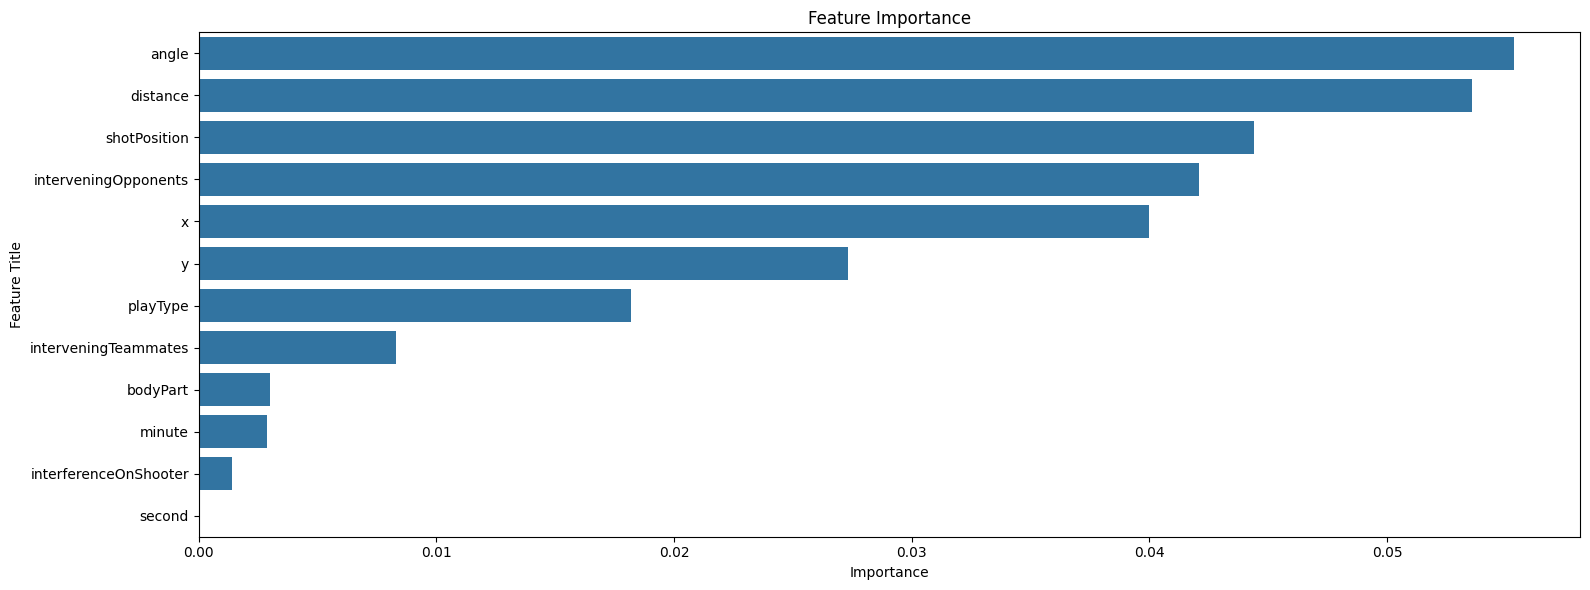

In [28]:
plt.figure(figsize=(16, 6))

sns.barplot(
    y="Feature",
    x="Importance",
    data=mi_df,
    order=mi_df["Feature"],
)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature Title")

plt.tight_layout()
plt.show()

In [29]:
pp_football_df.drop(columns=["bodyPart", "second", "minute","matchId","playerId"], inplace=True)

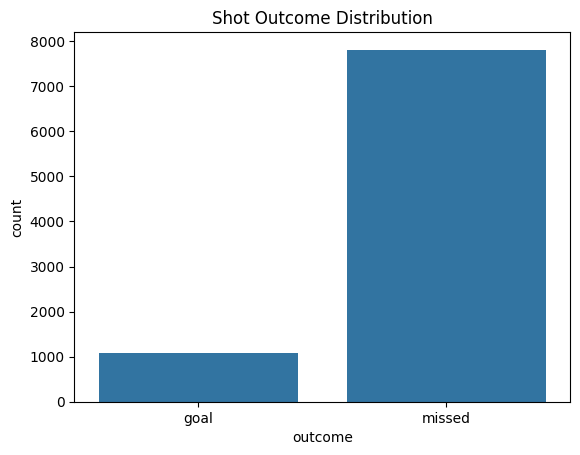

In [30]:
sns.countplot(x="outcome", data=pp_football_df)
plt.title("Shot Outcome Distribution")
plt.show()

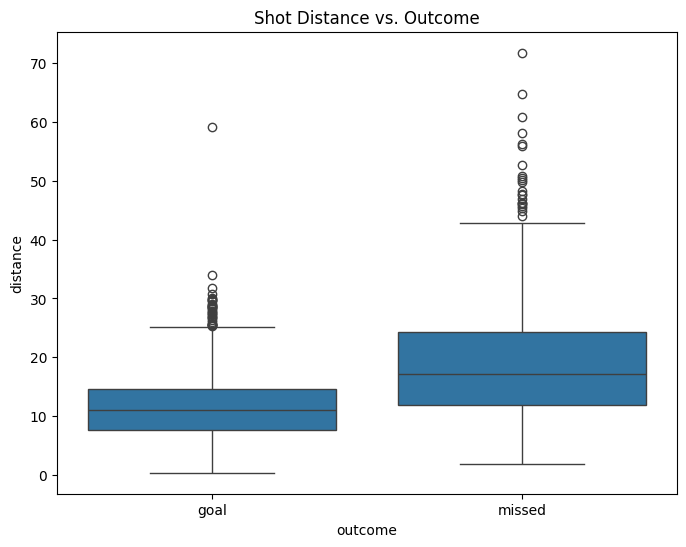

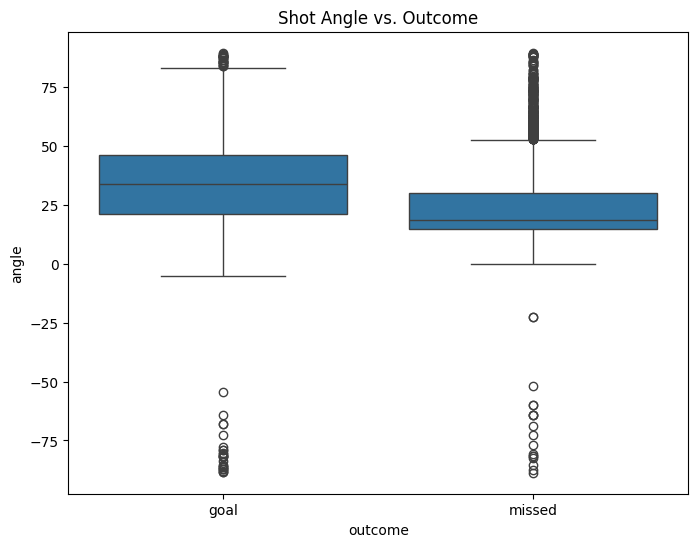

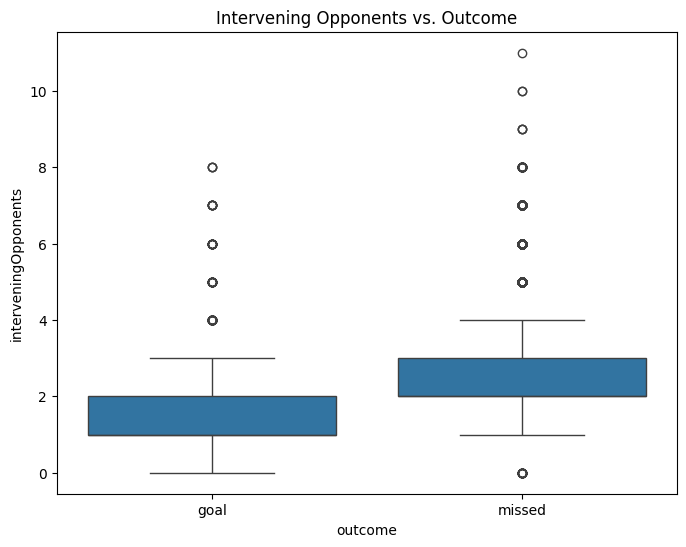

In [31]:
def plot_boxplot(df, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x_col, y=y_col, data=df)
    plt.title(title)
    plt.show()


plot_boxplot(pp_football_df, "outcome", "distance", "Shot Distance vs. Outcome")
plot_boxplot(pp_football_df, "outcome", "angle", "Shot Angle vs. Outcome")
plot_boxplot(pp_football_df, "outcome", "interveningOpponents", "Intervening Opponents vs. Outcome")

plt.show()

### Label encoding outcome

In [32]:
org_football_df["outcome"] = le.fit_transform(org_football_df["outcome"])
pp_football_df["outcome"] = le.fit_transform(pp_football_df["outcome"]) 

- **outcome:**    
0.    goal   
1.    missed    

In [33]:
def lazy_classifier(df):
    X = df.drop(columns=["outcome"])
    y = df["outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = LazyClassifier(predictions=True, verbose=False)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    return models,predictions

In [34]:
model_before , predictions_before = lazy_classifier(org_football_df)
model_after, predictions_after = lazy_classifier(pp_football_df)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:20<00:00,  1.00it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 926
[LightGBM] [Info] Number of data points in the train set: 7140, number of used features: 11
[LightGBM] [Info] Start training from score -2.116536
[LightGBM] [Info] Start training from score -0.132971
[LightGBM] [Info] Start training from score -5.506172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:11<00:00,  2.59it/s]

[LightGBM] [Info] Number of positive: 6246, number of negative: 866
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 870
[LightGBM] [Info] Number of data points in the train set: 7112, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.878234 -> initscore=1.975812
[LightGBM] [Info] Start training from score 1.975812


In [35]:
def print_models_accuracies(models, status):
    print(f"{status} preprocessing")
    models = models["Accuracy"]
    for model_name, score in models.items():
        print(f"    {model_name}: {score:.2f}")
        
print_models_accuracies(model_before,"before")
print_models_accuracies(model_after,"after")

before preprocessing
    AdaBoostClassifier: 0.89
    XGBClassifier: 0.88
    LGBMClassifier: 0.88
    ExtraTreesClassifier: 0.89
    GaussianNB: 0.89
    RandomForestClassifier: 0.89
    LinearSVC: 0.48
    BaggingClassifier: 0.86
    DecisionTreeClassifier: 0.80
    CalibratedClassifierCV: 0.88
    ExtraTreeClassifier: 0.80
    NearestCentroid: 0.18
    Perceptron: 0.75
    QuadraticDiscriminantAnalysis: 0.88
    LabelPropagation: 0.78
    LabelSpreading: 0.78
    LogisticRegression: 0.88
    KNeighborsClassifier: 0.86
    PassiveAggressiveClassifier: 0.87
    SGDClassifier: 0.87
    LinearDiscriminantAnalysis: 0.87
    DummyClassifier: 0.87
    RidgeClassifier: 0.87
    RidgeClassifierCV: 0.87
    SVC: 0.87
    BernoulliNB: 0.87
after preprocessing
    NearestCentroid: 0.70
    BernoulliNB: 0.77
    GaussianNB: 0.80
    ExtraTreeClassifier: 0.82
    DecisionTreeClassifier: 0.82
    LabelSpreading: 0.88
    LabelPropagation: 0.88
    ExtraTreesClassifier: 0.86
    KNeighborsClassifie

As you can see for some models like `LabelPropagation` , `LabelSpreading` , `LinearSVC` , `NearestCentroid` we have huge improvement in preprocessing model accuracy.

**LabelPropagation:** 0.77 -> 0.88             
**LabelSpreading:**   0.77 -> 0.88              
**LinearSVC:**        0.46 -> 0.88               
**NearestCentroid:**  0.18->0.70                

## <span style="color:cyan"><b>2.Multivariate Regression Implementation</b></span>



### <span style="color:cyan"><b>A)Theory :</b></span><br>
<span style="color:cyan"><b>Defenitions :</b></span><br>
Suppose our input has n features and our train dataset contains m records.For the convenience of calculations, we store these data in an n*m matrix called X.<br>
Also, according to m, we store the target field record in a 1 * m matrix called y.<br>
We also have the matrix of coefficients with the notation w, which is of dimensions 1 * n . The W matrix requires initialization, which can be done in two ways: all 0 or random initialization.Also, the b value, which is initially set to 0, represents the bias.<br>
<span style="color:cyan"><b>Prediction :</b></span><br>
$$
P = WX+b
$$
<span style="color:cyan"><b>Cost function :</b></span><br>
$$
J = \frac{1}{2m} \sum_{i=1}^{m} (P_{i}-Y_{i})^{2}
$$
<span style="color:cyan"><b>Back propagation :</b></span><br>
$$
\frac{\delta{J}}{\delta{\vec{P}}} = \frac{1}{m} \times (\vec{P}-\vec{Y}) \\
\frac{\delta{J}}{\delta{\vec{W}}} = \frac{\delta{J}}{\delta{\vec{P}}} . X^{T} \\
\frac{\delta{J}}{\delta{b}} = \frac{1}{m} \sum_{i=1}^{m} (P_{i}-Y_{i})
$$
<span style="color:cyan"><b>Gradiant decent update :</b></span><br>
$$
\vec{W} = \vec{W} - \alpha \times \frac{\delta{J}}{\delta{\vec{W}}} \\ 
b = b - \alpha \times \frac{\delta{J}}{\delta{b}}
$$

In [36]:
class MultivariateLinearRegression:
    def __init__(self, learningRate=0.25, iterations=20000):
        self.learningRate = learningRate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.iterationsCost = []
        
    def calc_cost(self ,predictions ,y ,numSamples ):
        return (1/(2*numSamples)) * np.sum(np.square(predictions - y))
    
    def normalize(self, X):
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        XNorm = (X - mean) / std
        return XNorm

    def fit(self, X, y):
        numSamples = X.shape[0] 
        numFeatures = X.shape[1]
        y = np.array(y).reshape(1, -1)
        
        X = self.normalize(X)
    
        self.weights = np.random.randn(1,numFeatures)
        self.bias = 0

        for i in range(self.iterations):
            yPredicted = np.dot(self.weights ,X.T) + self.bias
            
            dw = (1 / numSamples) * np.dot((yPredicted - y) ,X)
            db = (1 / numSamples) * np.sum(yPredicted - y)
            
            self.weights -= self.learningRate * dw
            self.bias -= self.learningRate * db
            
            cost = self.calc_cost(yPredicted, y, numSamples)
            self.iterationsCost.append(cost)

    def predict(self, X):
        X = self.normalize(X)
        return (np.dot(self.weights ,X.T) + self.bias).reshape(-1,)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2_score = 1 - (ss_res / ss_tot)
        return r2_score


In [37]:
data = pd.read_csv("cars.csv")

X = data.drop("Price in Thousands", axis=1)
y = data["Price in Thousands"]
hpX = data.drop("Horsepower", axis=1)
hpy = data["Horsepower"]

print(data.shape[1])

14


In [38]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
hpXTrain, hpXTest, hpyTrain, hpyTest = train_test_split(
    hpX, hpy, test_size=0.2, random_state=42
)

In [39]:
model = MultivariateLinearRegression(0.25 ,20000)
hpModel = MultivariateLinearRegression(0.1 ,500)

model.fit(XTrain, yTrain)
hpModel.fit(hpXTrain, hpyTrain)


In [40]:
from sklearn.metrics import mean_squared_error

yTrainPred = model.predict(XTrain)
yTestPred = model.predict(XTest)
hpyTrainPred = hpModel.predict(hpXTrain)
hpyTestPred = hpModel.predict(hpXTest)

mseTrain = mean_squared_error(yTrain, yTrainPred)
mseTest = mean_squared_error(yTest, yTestPred)
hpMseTrain = mean_squared_error(hpyTrain, hpyTrainPred)
hpMseTest = mean_squared_error(hpyTest, hpyTestPred)

print(f'price Training MSE: {mseTrain}')
print(f'price Testing MSE: {mseTest}')
print(f'horsepower Training MSE: {hpMseTrain}')
print(f'horsepower Testing MSE: {hpMseTest}')
print(f'price Training R2 Score: {model.score(XTrain , yTrain)}')
print(f'price Testing R2 Score: {model.score(XTest , yTest)}')
print(f'horsepower Training R2 Score: {hpModel.score(hpXTrain , hpyTrain)}')
print(f'horsepower Testing R2 Score: {hpModel.score(hpXTest , hpyTest)}')



price Training MSE: 0.00036932652998981593
price Testing MSE: 0.5750535578380195
horsepower Training MSE: 1.1446638642441012
horsepower Testing MSE: 25.06443398273668
price Training R2 Score: 0.9999918301507174
price Testing R2 Score: 0.9871896828505745
horsepower Training R2 Score: 0.999350480603638
horsepower Testing R2 Score: 0.9868961094014047


In [41]:
from sklearn.metrics import r2_score

libModel = LinearRegression()
hpLibModel = LinearRegression()

libModel.fit(XTrain, yTrain)
hpLibModel.fit(hpXTest, hpyTest)

libyTrainPred = libModel.predict(XTrain)
libyTestPred = libModel.predict(XTest)
hpLibyTrainPred = hpLibModel.predict(hpXTrain)
hpLibyTestPred = hpLibModel.predict(hpXTest)

libMseTrain = mean_squared_error(yTrain, libyTrainPred)
libMseTest = mean_squared_error(yTest, libyTestPred)
hpLibMseTrain = mean_squared_error(hpyTrain, hpLibyTrainPred)
hpLibMseTest = mean_squared_error(hpyTest, hpLibyTestPred)

libR2Train = r2_score(yTrain, libyTrainPred)
libR2Test = r2_score(yTest, libyTestPred)
hpLibR2Train = r2_score(hpyTrain, hpLibyTrainPred)
hpLibR2Test = r2_score(hpyTest, hpLibyTestPred)

print(f'library price Training MSE: {libMseTrain}')
print(f'library price Testing MSE: {libMseTest}')
print(f'library horsepower Training MSE: {hpLibMseTrain}')
print(f'library horsepower Testing MSE: {hpLibMseTest}')

print(f'library price Training R2: {libR2Train}')
print(f'library price Testing R2: {libR2Test}')
print(f'library horsepower Training R2: {hpLibR2Train}')
print(f'library horsepower Testing R2: {hpLibR2Test}')


library price Training MSE: 1.510274906723437e-16
library price Testing MSE: 1.7279366507949351e-16
library horsepower Training MSE: 1.1489100043206935e-15
library horsepower Testing MSE: 1.781975033519947e-17
library price Training R2: 1.0
library price Testing R2: 1.0
library horsepower Training R2: 1.0
library horsepower Testing R2: 1.0


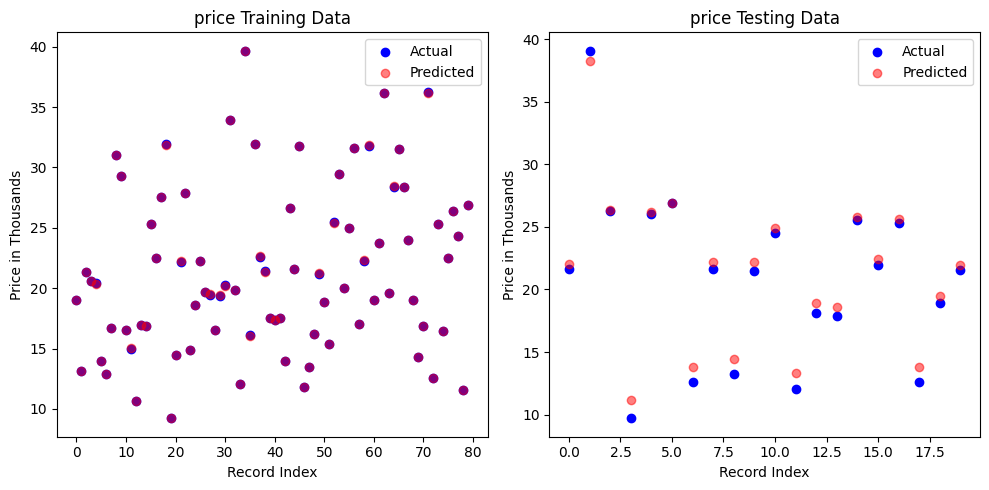

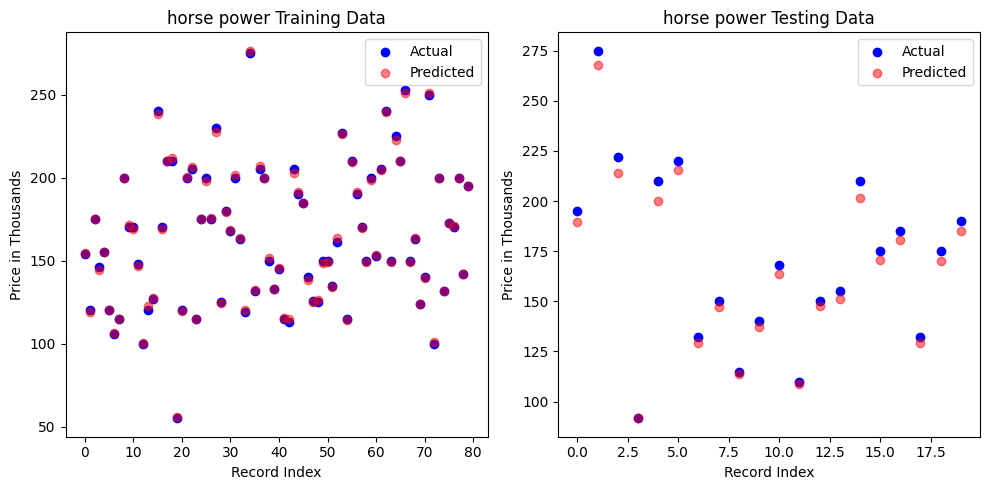

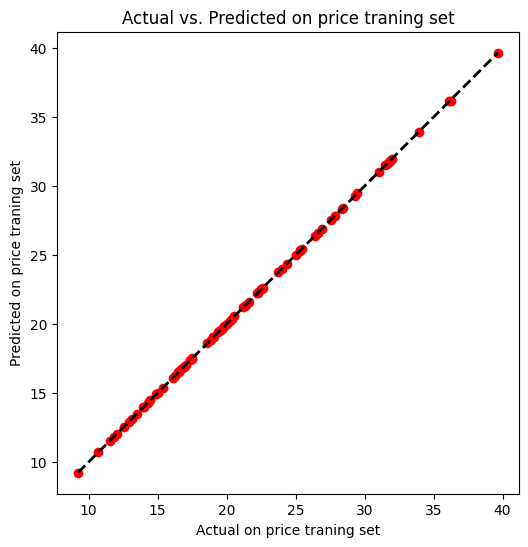

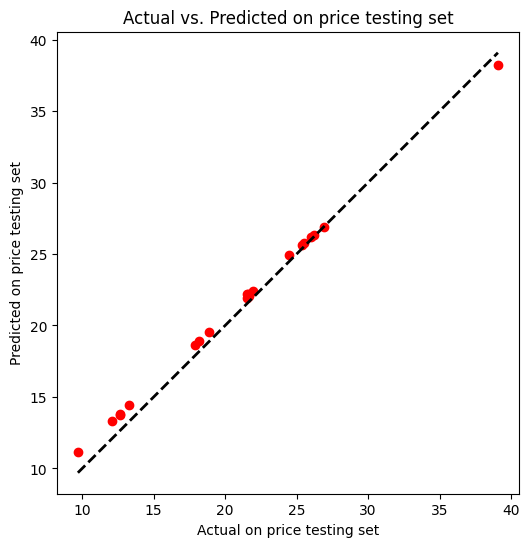

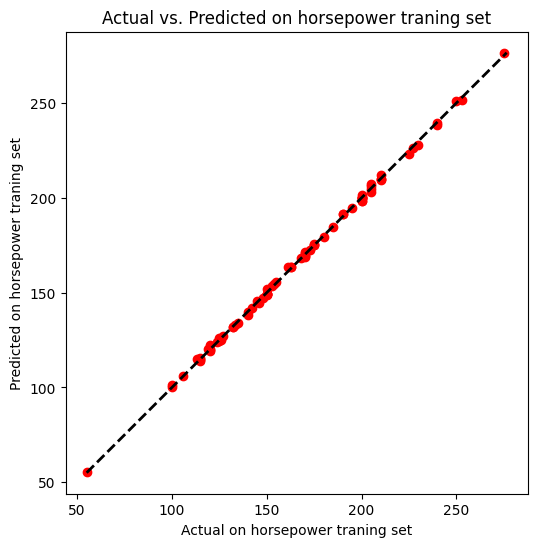

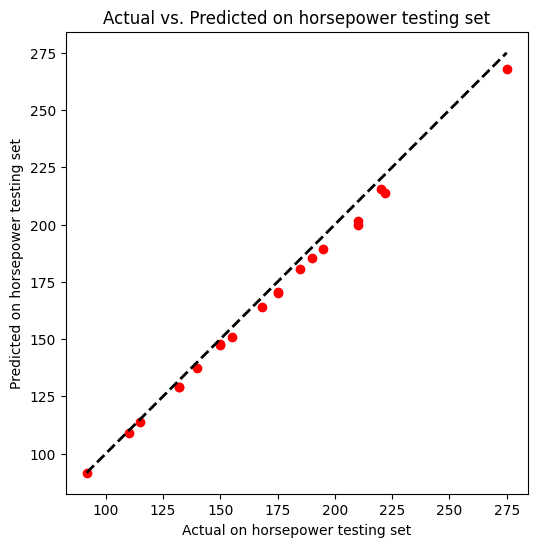

In [42]:
import matplotlib.pyplot as plt

def plotScatter (yTrainPred , yTestPred , yTrain , yTest , field):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(range(len(yTrain)), yTrain, color='blue', label='Actual')
    plt.scatter(range(len(yTrainPred)), yTrainPred, color='red', label='Predicted' , alpha= 0.5)
    plt.xlabel('Record Index')
    plt.ylabel('Price in Thousands')
    plt.title(f'{field} Training Data')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(range(len(yTest)), yTest, color='blue', label='Actual')
    plt.scatter(range(len(yTestPred)), yTestPred, color='red', label='Predicted' , alpha=0.5)
    plt.xlabel('Record Index')
    plt.ylabel('Price in Thousands')
    plt.title(f'{field} Testing Data')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
def plotActualVsPredicted(yTest, yPred, columnName):
    actualVal = yTest
    predVal = yPred
    plt.figure(figsize=(8, 6))
    plt.scatter(actualVal, predVal, alpha=1, color='red')
    minVal = min(min(actualVal), min(predVal))
    maxVal = max(max(actualVal), max(predVal))
    plt.plot([minVal, maxVal], [minVal, maxVal], 'k--', lw=2)
    plt.xlabel(f'Actual {columnName}')
    plt.ylabel(f'Predicted {columnName}')
    plt.title(f'Actual vs. Predicted {columnName}')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    
    
plotScatter(yTrainPred, yTestPred, yTrain, yTest , "price")
plotScatter(hpyTrainPred, hpyTestPred, hpyTrain, hpyTest, "horse power")
plotActualVsPredicted(yTrain , yTrainPred , "on price traning set")
plotActualVsPredicted(yTest , yTestPred , "on price testing set")
plotActualVsPredicted(hpyTrain , hpyTrainPred , "on horsepower traning set")
plotActualVsPredicted(hpyTest , hpyTestPred , "on horsepower testing set")


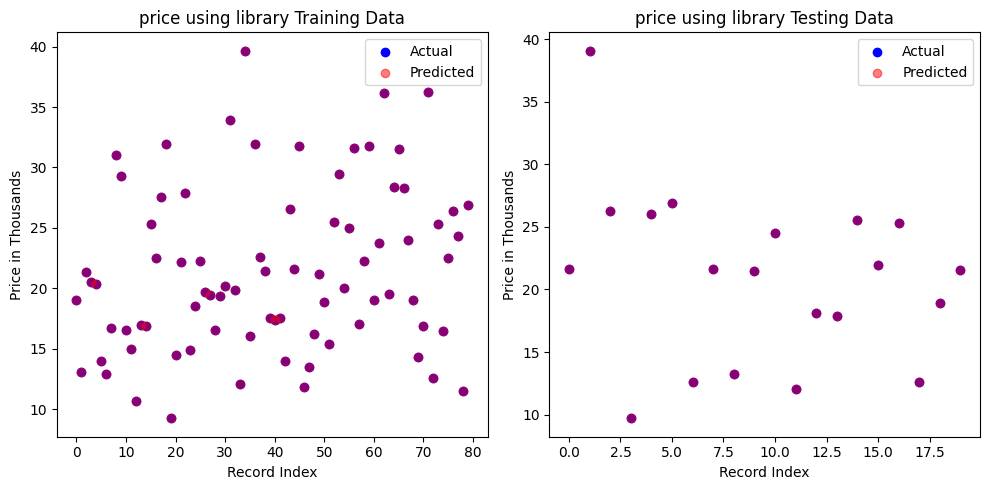

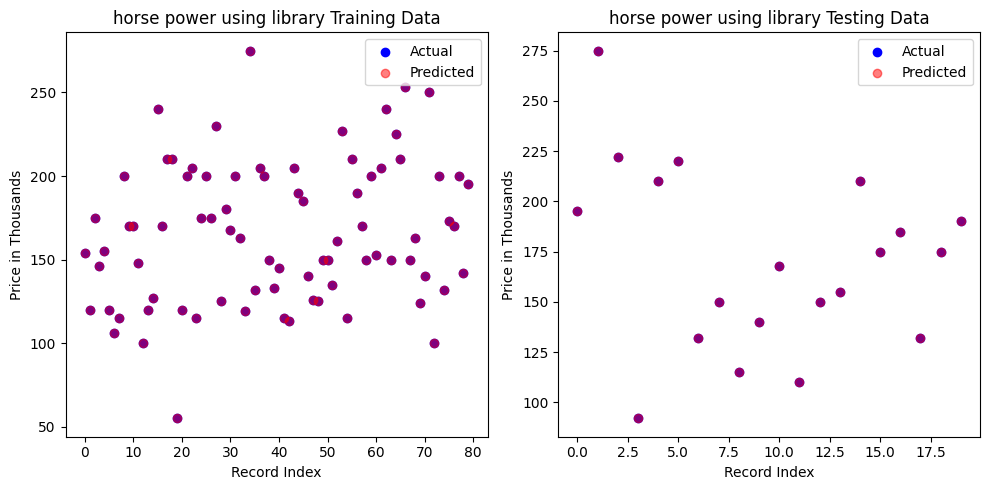

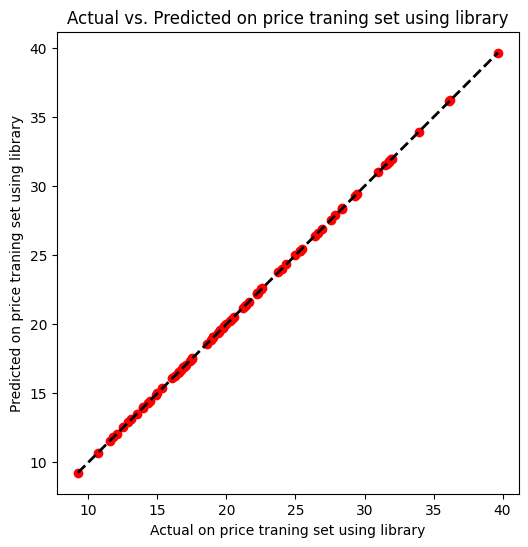

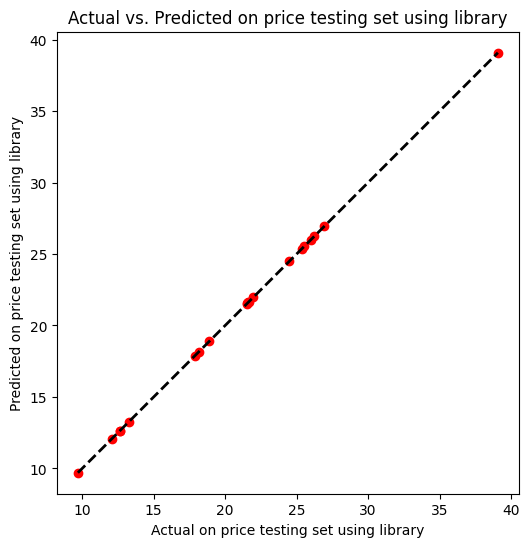

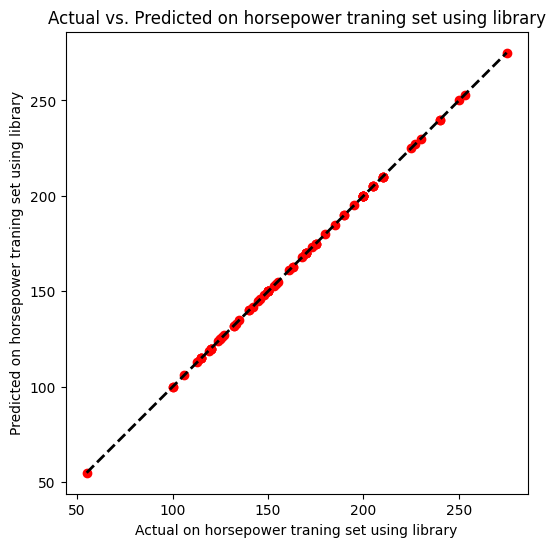

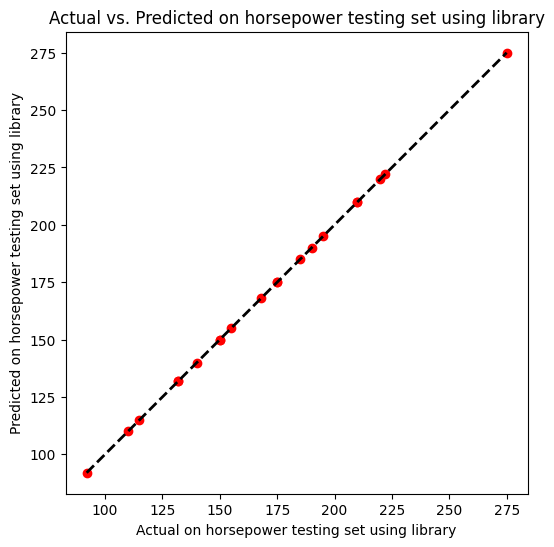

In [48]:
plotScatter(libyTrainPred, libyTestPred, yTrain, yTest , "price using library")
plotScatter(hpLibyTrainPred, hpLibyTestPred, hpyTrain, hpyTest, "horse power using library")
plotActualVsPredicted(yTrain , libyTrainPred , "on price traning set using library")
plotActualVsPredicted(yTest , libyTestPred , "on price testing set using library")
plotActualVsPredicted(hpyTrain , hpLibyTrainPred , "on horsepower traning set using library")
plotActualVsPredicted(hpyTest , hpLibyTestPred , "on horsepower testing set using library")

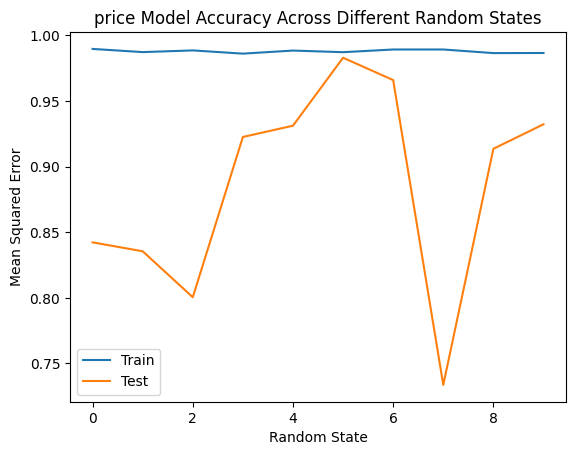

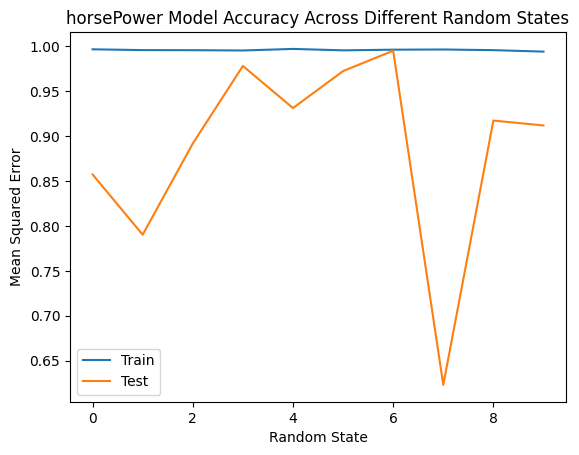

In [43]:
def plotRandomStatesMse(X, y, learningRate, epochs , field):    
    randomStates = range(10)
    trainScore = []
    testScore = []

    for state in randomStates:
        XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=state)

        model = MultivariateLinearRegression(learningRate=learningRate , iterations=epochs)
        model.fit(XTrain, yTrain)

        trainScore.append(model.score(XTrain , yTrain))
        testScore.append(model.score(XTest ,yTest))

    plt.plot(randomStates, trainScore, label='Train')
    plt.plot(randomStates, testScore, label='Test')
    plt.xlabel('Random State')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{field} Model Accuracy Across Different Random States')
    plt.legend()
    plt.show()
    
plotRandomStatesMse(X, y , 0.1 , 10000 , "price")
plotRandomStatesMse(hpX, hpy , 0.05 , 500 , "horsePower")


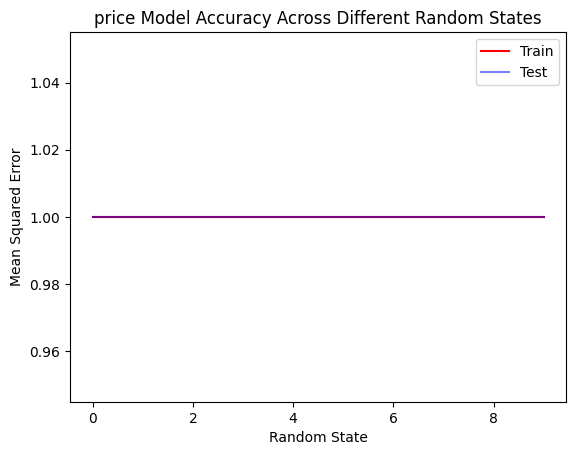

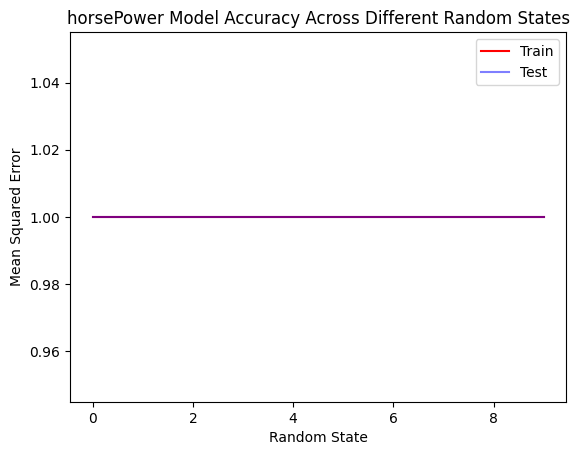

In [50]:
def plotLibRandomStatesMse(X, y, learningRate, epochs , field):    
    randomStates = range(10)
    trainScore = []
    testScore = []

    for state in randomStates:
        XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=state)

        model = LinearRegression()
        model.fit(XTrain, yTrain)

        trainScore.append(model.score(XTrain , yTrain))
        testScore.append(model.score(XTest ,yTest))

    plt.plot(randomStates, trainScore, label='Train', color='red')
    plt.plot(randomStates, testScore, label='Test', alpha=0.5, color='b')
    plt.xlabel('Random State')
    plt.ylabel('Mean Squared Error')
    plt.title(f'{field} Model Accuracy Across Different Random States')
    plt.legend()
    plt.show()
    
plotLibRandomStatesMse(X, y , 0.1 , 10000 , "price")
plotLibRandomStatesMse(hpX, hpy , 0.05 , 500 , "horsePower")


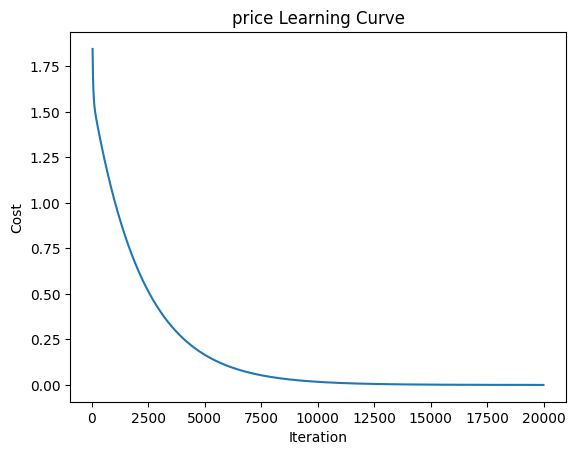

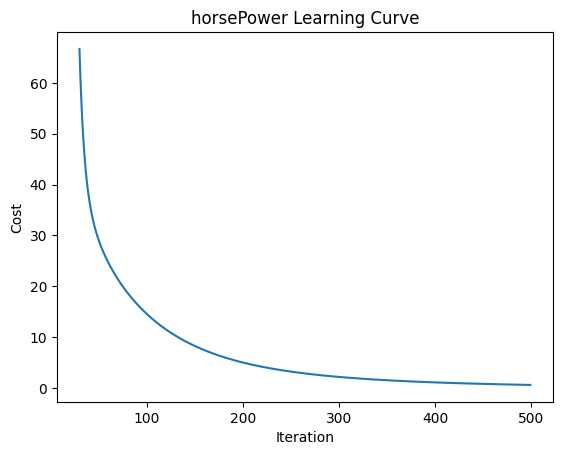

In [44]:
def plotLearningCurve(fromPoint ,model ,field):    
    plt.plot(range(fromPoint ,model.iterations), model.iterationsCost[fromPoint:])
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'{field} Learning Curve')
    plt.show()
    
plotLearningCurve(30 , model , "price")
plotLearningCurve(30 , hpModel , "horsePower")


## <span style="color:cyan"><b>3.Manual K-Fold Cross Validation Implementation</b></span>

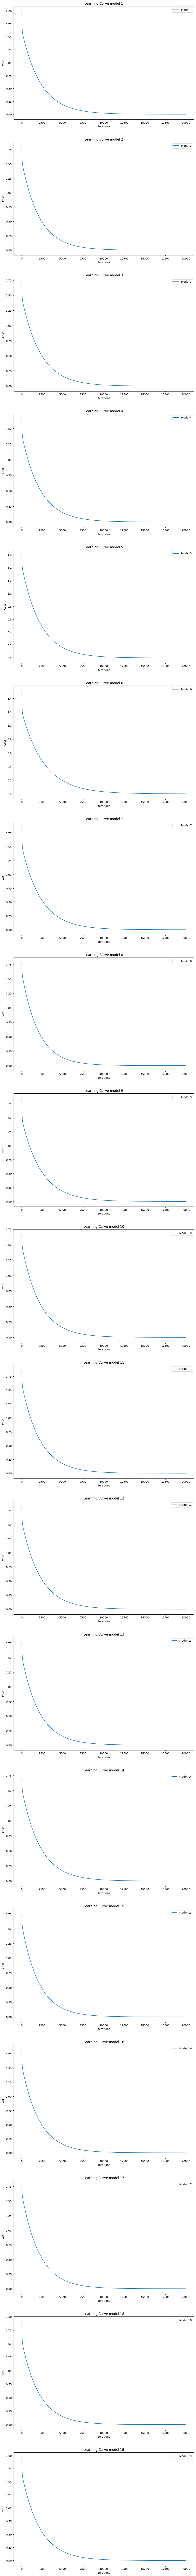

price MSE scores: [0.6797682309188213, 0.7052665527294275, 1.2248999274774595, 0.593721658386964, 0.6506186424036604, 0.44660851365127546, 0.48427594070880603, 1.038479201886374, 0.4161179991007871, 0.7112511470665085, 0.7111460287908071, 0.7349795074493348, 0.3083751833518729, 0.3695612560151067, 0.5115151938210574, 0.33032499618871813, 0.76683250398628, 0.700724945290855, 0.48382428416440043]
price RMSE scores: [0.8244805824995646, 0.839801496027143, 1.106751971978121, 0.7705333596846823, 0.8066093493158013, 0.6682877476441383, 0.6958993754191809, 1.0190579973124072, 0.6450720882977243, 0.843357069731741, 0.8432947460946304, 0.8573094583925543, 0.5553153908833006, 0.6079155007195546, 0.7152029039517789, 0.5747390679157961, 0.8756897304332625, 0.8370931520988898, 0.6955747868952701]
price R2 scores: [0.9848569815672249, 0.9842889621458687, 0.9727132258666688, 0.9867738184752484, 0.9855063392984567, 0.9900510193815409, 0.9892119119971368, 0.9768660714329603, 0.9907302485700524, 0.98415

In [45]:
import numpy as np
from sklearn.metrics import r2_score


class KFoldCrossValidation:
    def __init__(self, model, k=5):
        self.model = model
        self.k = k
        self.models = []

    def _kfold_split(self, X, y):
        fold_sizes = np.full(self.k, len(X) // self.k, dtype=int)
        fold_sizes[:len(X) % self.k] += 1
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            train_index = list(range(start)) + list(range(stop, len(X)))
            test_index = list(range(start, stop))
            yield X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
            current = stop


    def fit(self, X, y):
        for X_train, X_test, y_train, y_test in self._kfold_split(X, y):
            self.model = MultivariateLinearRegression()
            self.model.fit(X_train, y_train)
            self.models.append(self.model)
        return self.models

    def score(self, X, y):
        scores = []
        for model in self.models:
            scores.append(model.score(X, y))
        return scores

    def validate(self, X, y):
        mse_scores = []
        rmse_scores = []
        r2_scores = []
        for model in self.models:
            y_pred = model.predict(X)
            mse = mean_squared_error(y, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y, y_pred)
            mse_scores.append(mse)
            rmse_scores.append(rmse)
            r2_scores.append(r2)
        return mse_scores, rmse_scores, r2_scores

    def plot_learning_curve(self):
        fig , axs = plt.subplots(self.k , 1 , figsize = (12,9*self.k))
        for i, model in enumerate(self.models):
            axs[i].plot(range(30 ,model.iterations), model.iterationsCost[30:], label=f'Model {i+1}')
            axs[i].set_xlabel('Iterations')
            axs[i].set_ylabel('Cost')
            axs[i].set_title(f'Learning Curve model {i+1}')
            axs[i].legend()
        plt.show()

mlr = MultivariateLinearRegression()
kfold = KFoldCrossValidation(mlr, k=19)
models = kfold.fit(XTrain, yTrain)
scores = kfold.score(XTest, yTest)
mse_scores, rmse_scores, r2_scores = kfold.validate(XTest, yTest)
kfold.plot_learning_curve()

print(f'price MSE scores: {mse_scores}')
print(f'price RMSE scores: {rmse_scores}')
print(f'price R2 scores: {r2_scores}')
print(f'price MSE scores mean: {np.mean(mse_scores)}')
print(f'price RMSE scores mean: {np.mean(rmse_scores) }')
print(f'price R2 scores mean: {np.mean(r2_scores)}')


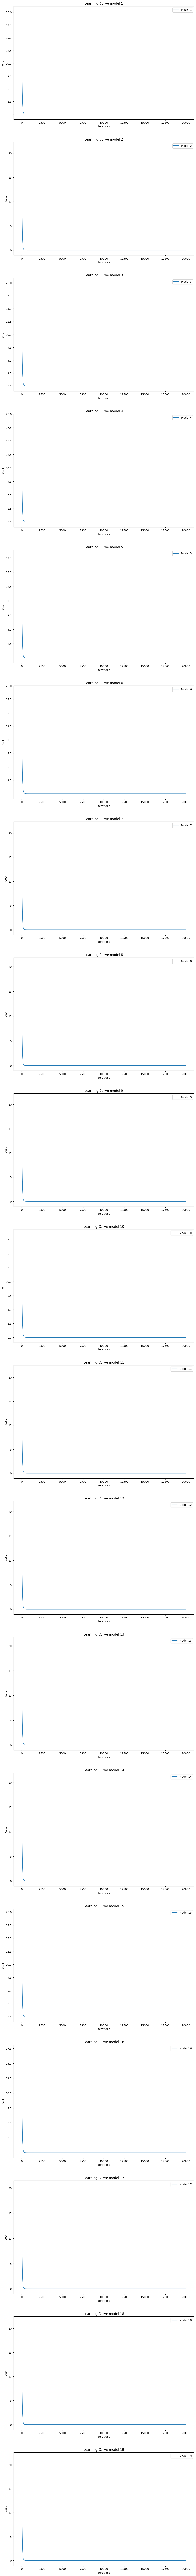

horsepower MSE scores: [12.787463640712911, 13.649774396691479, 9.959656841766726, 45.69259696236261, 22.00505857651889, 38.213131704226825, 22.69349203432307, 35.82176936313992, 25.13472742968922, 16.171153654157315, 19.133184720432403, 11.945184197000733, 31.122161371016546, 26.710668802751606, 35.67497919468499, 55.320015583220005, 28.120590329884585, 18.12109974177629, 26.713336037137577]
horsepower RMSE scores: [3.5759563253363305, 3.694560108685671, 3.155892400220059, 6.759629942708595, 4.69095497489785, 6.181677094788018, 4.763768679766375, 5.985129018086404, 5.013454640234538, 4.02133729674064, 4.37414959968591, 3.4561805793390965, 5.578723991291964, 5.168236527361302, 5.972853521951211, 7.437742640292147, 5.302885094916218, 4.2568885047386775, 5.168494561972333]
horsepower R2 scores: [0.9933146096697484, 0.9928637865705267, 0.9947930101376335, 0.9761115374808423, 0.9884955758266478, 0.9800218629462453, 0.9881356571976578, 0.9812720866904074, 0.9868593594137809, 0.9915455889216

In [46]:
mlr = MultivariateLinearRegression()
kfold = KFoldCrossValidation(mlr, k=19)
models = kfold.fit(hpXTrain, hpyTrain)
scores = kfold.score(hpXTest, hpyTest)
mse_scores, rmse_scores, r2_scores = kfold.validate(hpXTest, hpyTest)
kfold.plot_learning_curve()

print(f'horsepower MSE scores: {mse_scores}')
print(f'horsepower RMSE scores: {rmse_scores}')
print(f'horsepower R2 scores: {r2_scores}')
print(f'horsepower MSE scores mean: {np.mean(mse_scores)}')
print(f'horsepower RMSE scores mean: {np.mean(rmse_scores) }')
print(f'horsepower R2 scores mean: {np.mean(r2_scores)}')

In [53]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

lr = LinearRegression()

kf = KFold(n_splits=19)

scores = cross_val_score(lr, XTrain, yTrain, cv=kf)

mse_scorer = make_scorer(mean_squared_error)
mse_scores = cross_val_score(lr, XTrain, yTrain, cv=kf, scoring=mse_scorer)
rmse_scores = np.sqrt(mse_scores)
r2_scorer = make_scorer(r2_score)
r2_scores = cross_val_score(lr, XTrain, yTrain, cv=kf, scoring=r2_scorer)

print(f'price MSE scores: {mse_scores}')
print(f'price RMSE scores: {rmse_scores}')
print(f'price R2 scores: {r2_scores}')
print(f'price MSE scores mean: {np.mean(mse_scores)}')
print(f'price RMSE scores mean: {np.mean(rmse_scores) }')
print(f'price R2 scores mean: {np.mean(r2_scores)}')


price MSE scores: [9.53851337e-17 8.19602618e-17 9.21973358e-17 3.25290557e-16
 1.98368949e-16 1.25441836e-16 1.60444797e-16 7.08569268e-16
 1.24063723e-16 1.38733305e-16 1.66649595e-16 1.39929239e-16
 2.36897435e-16 2.88286154e-17 5.79651861e-16 9.47126454e-16
 2.27842339e-16 1.46975656e-16 9.52711301e-17]
price RMSE scores: [9.76653130e-09 9.05319070e-09 9.60194438e-09 1.80358132e-08
 1.40843512e-08 1.12000820e-08 1.26666806e-08 2.66189644e-08
 1.11383896e-08 1.17785103e-08 1.29092833e-08 1.18291690e-08
 1.53914728e-08 5.36922856e-09 2.40759602e-08 3.07754196e-08
 1.50944473e-08 1.21233517e-08 9.76069311e-09]
price R2 scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
price MSE scores mean: 2.43138288994076e-16
price RMSE scores mean: 1.4277551750882674e-08
price R2 scores mean: 1.0


### Question 1 : Describe your strategy for addressing challenges such as handling missing values and categorical features. Could you also elaborate on your feature selection metrics and explain the rationale behind them?
As you can see in the code, very small amount of our data is missed. so we simply drop them from our data set and sure that it doesn't affect our evaluations.

Also for handling categorical features, we turned some of them into binary features (e.g outcome -> goal/missed).
For catogorical features , we used LabelEncoder to convert categorical features into numerical representations.This is a common strategy to handle categorical variables before feeding them into machine learning models.

**Label Encoding:** The categorical features like `playType`, `bodyPart`, and `interferenceOnShooter` and `outcome` are transformed into numerical values using LabelEncoder. LabelEncoder assigns a unique integer to each category in the feature.      
       
Mutual Information is a metric we used to measure the dependency between two variables, in this case, between each feature and the target variable. Higher values of Mutual Information indicate a stronger relationship between the feature and the target.

- Rationale: Mutual Information measures the amount of information obtained about one variable through the other variable. It is particularly useful for feature selection in classification tasks because it captures both linear and non-linear relationships between features and the target.
     
- Strategy: Calculate Mutual Information between each feature and the target variable. Features with higher Mutual Information are considered more informative for predicting the target variable and are thus selected for the model.
                 
- Identification of Informative Features: Mutual Information helps identify features that have the highest dependency on the target variable. These features are likely to provide the most valuable information for the predictive model.
                  
- Non-linear Relationships: Unlike correlation coefficients, Mutual Information can capture non-linear relationships between features and the target variable. This is especially useful when dealing with complex datasets where the relationships may not be linear.
        
- Model Performance: Selecting features with higher Mutual Information can potentially improve the performance of the predictive model by focusing on the most informative features and reducing the noise caused by irrelevant features.
     
- Reducing Overfitting: By selecting features based on their mutual information with the target variable, the risk of overfitting is reduced because only the most relevant features are used for training the model.

### Question 2 : Why didn’t we use regression to predict whether a shot would result in a goal?
In the case of predicting whether a shot would result in a goal, the output is binary: either a goal is scored (1) or it isn’t (0). This is a classic example of a binary classification problem, and it’s typically more appropriate to use a classification algorithm for this type of problem.

On the other hand, regression is used when the output variable is a real or continuous value, such as predicting the number of goals a team will score in a season, the number of shots a player will take in a game, or the amount of time until the next goal is scored.

Classification algorithms like BernoulliNB are designed to handle binary outcomes and can provide probabilities for each class, which can be useful for understanding the confidence of the model in its predictions. They also have methods for handling class imbalance, which can be an issue in datasets where goals are relatively rare events.


### Question 3 : Howwould you go about verifying the accuracy of the given formula used to calculate the shot angle in the preprocessing section?
 To verify the accuracy of the formula used to calculate the shot angle, we could compare the calculated angles with known angles for specific shots. We could manually calculate the angles for a few shots using the given formula and compare them with the actual angles. If the calculated angles are close to the actual angles, it would indicate that the formula is accurate. Additionally, we could plot the calculated angles against the actual angles to visualize the relationship and assess the accuracy of the formula. For full mathematical proof you can check out this [link](https://soccermatics.medium.com/the-geometry-of-shooting-ae7a67fdf760).

### Question 4 : Discuss the advantages and disadvantages of k-fold cross-validation. Can you also explain other types of cross-validation methods that could address the limitations and issues associated with k-fold cross-validation?

- **K-Fold Cross-Validation**: It divides the data into 'k' groups. It's more reliable and efficient as each data point gets to be in the test set once and in the training set 'k-1' times. However, it's not ideal for time-series data and can be computationally expensive.

- **Stratified K-Fold Cross-Validation**: It's a variation of k-fold which is beneficial for imbalanced datasets. It ensures each fold is a good representative of the whole dataset, maintaining the ratio of the classes in each fold.

- **Time Series Cross-Validation**: This method respects the order of the data, making it suitable for time-series data. It progressively includes more data in the training set as we move forward in time.

- **Leave-One-Out (LOOCV) and Leave-P-Out Cross-Validation**: These are exhaustive methods where each data point (or 'p' data points for Leave-P-Out) is used as the validation set. While they provide a comprehensive evaluation, they can be computationally expensive.

### Question 5 : What metrics did you use to evaluate your manual implementations of multivariate regression and k-fold cross-validation, and why did you choose them?

1. **Coefficient of Determination (R² Score):** This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In the context of multivariate regression, this can be interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variables.

2. **Mean Squared Error (MSE):** This is the average squared difference between the predicted and actual values. It's a popular choice for regression problems. The squaring is useful because it removes the sign, allowing all differences to be treated equally, whether they're overestimations or underestimations.

3. **Cross-Validation Score:** This is typically used in the context of k-fold cross-validation. It's the average of the model performance measures across the 'k' folds. It provides a robust estimate of the model's performance on unseen data.